# My direct mia

In [0]:
# google colab pleaaase gimme more memory

#a = []
#while(1):
#    a.append('1')

## Imports, Download Models and Mounting Google Drive

In [1]:
# automatically reload my imports (%aimport) every time they are used
# cool feature for development
%load_ext autoreload
%autoreload 1

# Install TensorFlow on Google Colab
try:
  #%tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras.models import Model

TensorFlow 2.x selected.


In [0]:
# load pre-trained models for mnist dataset
!pip install gdown

if not os.path.isdir('storage'):
  os.system('gdown --id 13GYcHaQ-JPntKdtTGQn3QU5vGKw3bM4y')
  os.system('unzip storage.zip')

In [0]:
# mount google drive on google colab

# catch the output of the cell
#%%capture

# mount google drive
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

# navigate to project folder
#%cd ~
#%cd ..
#%cd content/drive/My\ Drive/mia
#%ls

In [0]:
# my imports
%aimport model_utils
%aimport data
mu = model_utils

## Load and Preprocess Datasets

In [5]:
# details of the datasets

# n_trgt_knwldg: size of kownledge of the target
# n_bckgrnd_knwldg: size of the background knowledge of the attacker
# n_training_set: size of training set of target and refernce models
# n_target_models: number of target models
# n_reference_models: number of reference models
# n_categories: number of categories for the prediction
# input_shape: sample dimensions
# dataset_path: path to the trained models etc.

# for mnist
dataset_details_mnist = {
    'n_trgt_knwldg': 20000,
    'n_bckgrnd_knwldg': 40000,
    'n_training_set': 10000,
    'n_target_models': 100,
    'n_reference_models': 100,
    'n_categories': 10,
    'input_shape': (28, 28, 1),
    'dataset_path': 'storage/mnist_old/'
}

# for fashion_mnist
dataset_details_fashion_mnist = {
    'n_trgt_knwldg': 20000,
    'n_bckgrnd_knwldg': 40000,
    'n_training_set': 10000,
    'n_target_models': 100,
    'n_reference_models': 100,
    'n_categories': 10,
    'input_shape': (28, 28, 1),
    'dataset_path': 'storage/fashion_mnist/'
}

# for cifar10
dataset_details_cifar10 = {
    'n_trgt_knwldg': 20000,
    'n_bckgrnd_knwldg': 30000,
    'n_training_set': 10000,
    'n_target_models': 100,
    'n_reference_models': 100,
    'n_categories': 10,
    'input_shape': (32, 32, 3),
    'dataset_path': 'storage/cifar10/'
}

# load mnist dataset
# 60000 training samples <- we use this samples for our training
# 10000 test samples
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
mnist_data = data.Data(train_images, train_labels, test_images, test_labels, dataset_details_mnist)

# load fashion mnist dataset
# 60000 training samples <- we use this samples for our training
# 10000 test samples
#(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
#fashion_mnist_data = data.Data(train_images, train_labels, test_images, test_labels, dataset_details_fashion_mnist)

# load cifar 10 dataset
# 50000 training examples <- we use this samples for our training
# 10000 test examples
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#cifar_data = data.Data(train_images, train_labels, test_images, test_labels, dataset_details_cifar10)

# choose the dataset for this run
used_data = mnist_data

# create directory structure
mu.create_dir_structure(used_data.dataset_path)

#records_per_target_model = mu.get_records_per_target_model(used_data)
#records_per_reference_model = mu.get_records_per_reference_model(used_data)

11493376/11490434 [==============================] - 0s 0us/step


## Train Models

In [0]:
n_epochs = 50
n_batches = 50

### Train Target Models

In [0]:
# train models and/or...
#mu.train_target_models(used_data, records_per_target_model, n_epochs, n_batches)

# ...load models
path = used_data.dataset_path + 'target_models/'
target_models = mu.load_models(path , used_data.n_target_models)
print(target_models.shape)

In [0]:
# evaluate target_models
#mu.evaluate_models(target_models, used_data, n_batches)

### Train Reference Models

In [0]:
#mu.train_reference_models(used_data, records_per_reference_model, n_epochs, n_batches)
path = used_data.dataset_path + 'reference_models/'
reference_models = mu.load_models(path, used_data.n_reference_models)
print(reference_models.shape)

In [0]:
# evaluate reference_models
#mu.evaluate_models(reference_models, used_data, n_batches)

## Select Target Records

### Get High-Level-Features

In [0]:
# generate intermediate models from reference models
#intermediate_models = mu.gen_intermediate_models(reference_models)

# use intermediate models to generate high_level_features
#high_level_features_target = mu.gen_high_level_features(used_data, intermediate_models, used_data.target_train_images, 'target.csv')
high_level_features_target = np.genfromtxt(used_data.dataset_path + 'high_level_features/target.csv', delimiter=',')

#high_level_features_reference = mu.gen_high_level_features(used_data, intermediate_models, used_data.reference_train_images, 'reference.csv')
high_level_features_reference = np.genfromtxt(used_data.dataset_path + 'high_level_features/reference.csv', delimiter=',')

In [0]:
high_level_features_all = np.append(high_level_features_target, high_level_features_reference, axis=0)

### Plot High-Level-Features

In [0]:
mu.plot_high_level_features(high_level_features_all, used_data)

### Select Target Records using the High-Level-Features

min_distance:  0.0004496391237538422
mean n_neighbors:  2655.96295
mean est_n_neighbors:  1327.981475
number of target_records:  12
target_records:  [ 1075  1127  8202  9611  9661  9924 13376 14305 14619 16676 16836 17603]


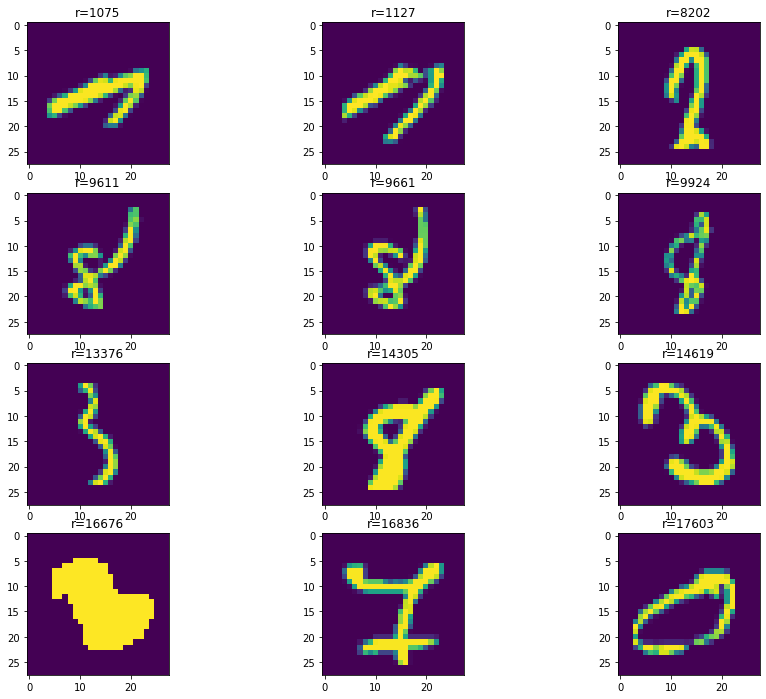

In [0]:
# parameters for mnist, cosine
neighbor_threshold = 0.17
probability_threshold = 0.1

# parameters for mnist, euclidean
#neighbor_threshold = 145
#probability_threshold = 0.1

# some possible metrices: 'euclidean', 'cosine'
# this function is realy ram hungry!
target_records = mu.select_target_records(high_level_features_target, 
                                       high_level_features_reference, 
                                       neighbor_threshold, 
                                       probability_threshold, 'cosine',
                                       used_data, n_jobs=-1)

print('number of target_records: ', len(target_records))
print('target_records: ', target_records)
if(len(target_records) < 20):
  mu.plot_target_records(target_records, used_data.input_shape, used_data)

## Direct Inference Attack

In [0]:
reference_inferences = mu.get_model_inference(target_records, 
                                           used_data.target_train_images, 
                                           used_data.target_train_labels,
                                           reference_models)
target_inferences = mu.get_model_inference(target_records,
                                           used_data.target_train_images,
                                           used_data.target_train_labels,
                                           target_models)

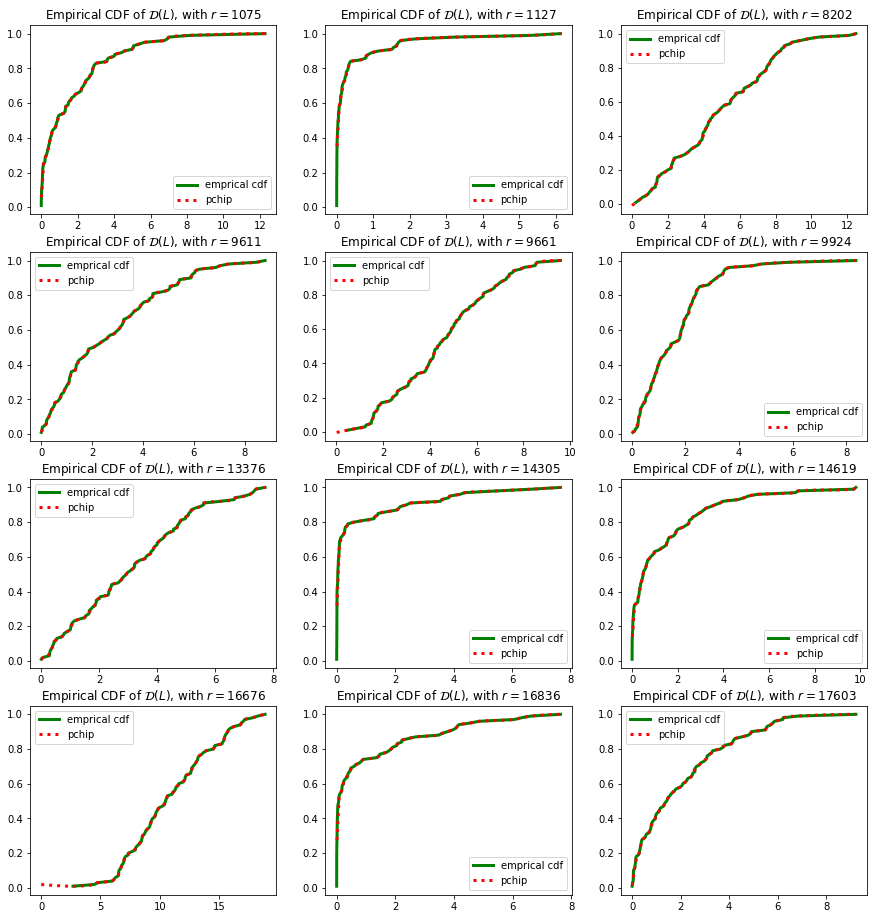

In [0]:
pchip_references = mu.sample_reference_losses(target_records, reference_inferences)

In [0]:
cut_off_p_value = 0.015
path = used_data.dataset_path + 'target_models/records_per_target_model.csv'
records_per_target_model = np.genfromtxt(path, delimiter=',', dtype='i')

p_values = mu.hypothesis_test(used_data, records_per_target_model, 
                              target_records, cut_off_p_value, pchip_references, 
                              target_inferences)